In [12]:
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

from pyecharts.charts import Bar
from pyecharts import options as opts

bar = (
    Bar()
    .add_xaxis(['shirt','sweat','tie','jeans','cloat','shoes','socks'])
    .add_yaxis('shopA',[114,55,227,101,125,27,105])
    .add_yaxis('shopB',[57,134,137,129,145,60,49])
    .set_global_opts(title_opts=opts.TitleOpts(title = 'selling score of mails'))
)

In [13]:
bar.load_javascript()

In [14]:
bar.render_notebook()

In [11]:
bar

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [17]:
print(tf.__version__)

2.0.0


In [18]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [19]:
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]

In [20]:
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

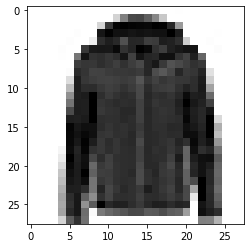

In [23]:
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap='binary')
    plt.show
show_single_image(x_train[0])

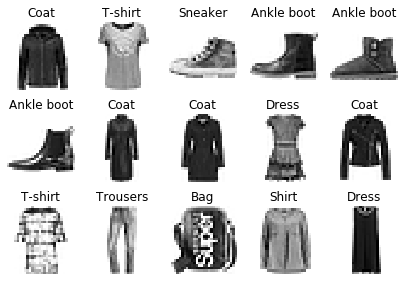

In [26]:
def show_imgs(n_rows,n_cols,x_data,y_data,class_names):
    assert len(x_data) == len(y_data)
    assert n_rows*n_cols < len(x_data)
    plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols*row + col
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap='binary',interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()
class_names = ['T-shirt','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
show_imgs(3,5,x_train,y_train,class_names)
    

In [40]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300,activation = 'relu'))
model.add(keras.layers.Dense(100,activation = 'relu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))


model.compile(loss='sparse_categorical_crossentropy',optimizer = 'sgd', metrics = ['accuracy'])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(x_train_scaled,y_train,epochs=10,validation_data=(x_valid_scaled,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 105us/sample - loss: 0.5309 - accuracy: 0.8108 - val_loss: 0.3965 - val_accuracy: 0.8578
Epoch 2/10
55000/55000 [==============================] - 6s 105us/sample - loss: 0.3873 - accuracy: 0.8604 - val_loss: 0.4002 - val_accuracy: 0.8546
Epoch 3/10
55000/55000 [==============================] - 6s 101us/sample - loss: 0.3500 - accuracy: 0.8725 - val_loss: 0.3528 - val_accuracy: 0.8756
Epoch 4/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.3255 - accuracy: 0.8820 - val_loss: 0.3393 - val_accuracy: 0.8794
Epoch 5/10
55000/55000 [==============================] - 5s 99us/sample - loss: 0.3067 - accuracy: 0.8893 - val_loss: 0.3294 - val_accuracy: 0.8818
Epoch 6/10
55000/55000 [==============================] - 5s 99us/sample - loss: 0.2917 - accuracy: 0.8940 - val_loss: 0.3468 - val_accuracy: 0.8736
Epoch 7/10
55000/55000 [==============================

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled = scaler.transform(
    x_text.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)


NameError: name 'x_text' is not defined

In [42]:
x_test_scaled.shape

(55000, 28, 28)

In [43]:
x_test.shape

(10000, 28, 28)